# EXAMEN ROPL

Fichier à :
* Renommer avec votre NomPrenom
* Envoyer **avant 16h** à roland.grappe@lamsade.dauphine.fr

## Nom - Prénom (double-cliquer ici, puis exécuter la cellule) :

* LATEB MELISSA


**Enregistrez bien votre fichier avant de l'envoyer.**

**Commentez bien votre cote :** Décrivez précisément vos variables/contraintes/fonction objectif, ou autre, en commentaire.

In [1]:
# Librairies à importer pour utiliser JuMP avec le solver GLPK
using JuMP
using GLPK

# Définition de constantes pour le statut de résolution du problème
const OPTIMAL = JuMP.OPTIMAL
const INFEASIBLE = JuMP.INFEASIBLE
const UNBOUNDED = JuMP.DUAL_INFEASIBLE;

# Exercice 1 :

Un fermier dispose de $100$ acres de terre (une acre est une mesure de surface agraire), et de $1100$ euros d'investissement pour une période de $160$ jours de main d'oeuvre. Vous disposez de l'ensemble des informations suivantes.

Coût de travail et d'ensemencement :
 * $20$ euros  par acre de blé,
 * $10$ euros  par acre de pommes de terre.

Temps de main d'oeuvre :
* $4$ jours par acre de blé,
* $1$ jours par acre de pommes de terre.

Revenus :
* $120$ euros  par acre de blé,
* $40$ euros  par acre de pommes de terre.


**Q1.** Répondre grâce à Julia : Quelles surfaces de blé et de pommes de terre cultiver pour obtenir un revenu maximum ?

Afficher le nombre de jours travaillés ainsi que le montant dépensé sur les 1100 euros d'investissement.


In [2]:
############################## 
#   Saisir votre code ici.   #
##############################
# Q1 - Pour trouver la surface de blé et de pommes de terre pour avoir un revenu maximum 
# Il suffit de maximiser la fonction objective definie ci-dessou:


# Création du modèle
model = Model(GLPK.Optimizer)

# Variables de décision : Surface de blé (w) et de pommes de terre (p) à cultiver
@variable(model, w >= 0)  # Surface de blé
@variable(model, p >= 0)  # Surface de pommes de terre

# Contraintes
@constraint(model, w + p <= 100)  # Contrainte de surface totale disponible
@constraint(model, 20w + 10p <= 1100)  # Contrainte de coût total d'investissement
@constraint(model, 4w + p <= 160)  # Contrainte de jours de main d'oeuvre disponibles

# Fonction objectif : Maximiser le revenu total
@objective(model, Max, 120w + 40p)

# Résolution du modèle avec optimize
optimize!(model)

# Afficher les resultats:

println("Surface de blé à cultiver: ", value(w), " acres")
println("Surface de pommes de terre à cultiver: ", value(p), " acres")
println("Revenu total: ", objective_value(model), " euros")
println("Jours de travail utilisés: ", value(4w + p), " jours")
println("Montant dépensé: ", value(20w + 10p), " euros sur 1100 euros d'investissement")
#Résultats:
#Surface de blé à cultiver: 25.0 acres
#Surface de pommes de terre à cultiver: 60.0 acres
#Revenu total: 5400.0 euros
#Jours de travail utilisés: 160.0 jours
#Montant dépensé: 1100.0 euros sur 1100 euros d'investissement


Surface de blé à cultiver: 25.0 acres
Surface de pommes de terre à cultiver: 60.0 acres
Revenu total: 5400.0 euros
Jours de travail utilisés: 160.0 jours
Montant dépensé: 1100.0 euros sur 1100 euros d'investissement


**Q2.** Proposer une autre méthode pour résoudre ce problème d'optimisation.

In [3]:
#Q2. Expliquer ici la marche à suivre:
# nous pouvons utiliser la méthode de recherche par grille qui teste toutes les combinaisons possibles pour cultiver du blé 
#et des pommes de terre, cela reste une methode longue en complexité car on calcul toutes les combinaison possibl et on 
#trouve la meilleure combinaison qui respecte les limites de terre, d'argent, et de travail, et qui donne le plus d'argent.
# Initialisation des variables pour conserver le meilleur revenu et les surfaces optimales
max_revenu = 0
surface_ble_optimale = 0
surface_pommes_de_terre_optimale = 0

# Paramètres du problème
budget_total = 1100
jours_oeuvre_total = 160
surface_total = 100

# Coûts et revenus unitaires
cout_ble = 20
cout_pommes_de_terre = 10
jours_ble = 4
jours_pommes_de_terre = 1
revenu_ble = 120
revenu_pommes_de_terre = 40

# Boucle de recherche par grille
for surface_ble in 0:surface_total
    for surface_pommes_de_terre in 0:(surface_total - surface_ble)
        coût = cout_ble * surface_ble + cout_pommes_de_terre * surface_pommes_de_terre
        jours_oeuvre = jours_ble * surface_ble + jours_pommes_de_terre * surface_pommes_de_terre
        revenu = revenu_ble * surface_ble + revenu_pommes_de_terre * surface_pommes_de_terre
        
        # Vérification des contraintes de budget et de jours de main d'œuvre
        if coût <= budget_total && jours_oeuvre <= jours_oeuvre_total
            # Mise à jour du meilleur revenu et des surfaces optimales si le revenu actuel est plus élevé
            if revenu > max_revenu
                max_revenu = revenu
                surface_ble_optimale = surface_ble
                surface_pommes_de_terre_optimale = surface_pommes_de_terre
            end
        end
    end
end

# Affichage des résultats
println("Surface optimale de blé à cultiver: ", surface_ble_optimale, " acres")
println("Surface optimale de pommes de terre à cultiver: ", surface_pommes_de_terre_optimale, " acres")
println("Revenu maximal: ", max_revenu, " euros")

#Résultat:
#Surface optimale de blé à cultiver: 25 acres
#Surface optimale de pommes de terre à cultiver: 60 acres
#Revenu maximal: 5400 euros


Surface optimale de blé à cultiver: 25 acres
Surface optimale de pommes de terre à cultiver: 60 acres
Revenu maximal: 5400 euros


**Q3.** Le fermier peut embaucher un ouvrier pour travailler quelques jours de plus. Pour que cela lui reste rentable, quel salaire journalier peut-il proposer au maximum ?

In [6]:
#Q3. Pour cette question il faut voir combien le fermier gagne de revenu en plus en employant un ouvrier
using JuMP, GLPK

# Fonction pour calculer le revenu maximum en fonction des jours de travail supplémentaires
# en prenant en compte 160 jours + le nbre de jours que le fermier auras travaillée
# Les autres conditions ne changement pas (surface, revenu)
function calculer_revenu_max(jours_supplementaires::Int)
    model = Model(GLPK.Optimizer)
    @variable(model, blé >= 0)
    @variable(model, pommes_de_terre >= 0)
    @constraint(model, blé + pommes_de_terre <= 100)
    @constraint(model, 20*blé + 10*pommes_de_terre <= 1100)
    @constraint(model, 4*blé + pommes_de_terre <= 160 + jours_supplementaires)
    @objective(model, Max, 120*blé + 40*pommes_de_terre)
    optimize!(model)
    return objective_value(model)
end

# Revenu maximum sans jours supplémentaires
revenu_initial = calculer_revenu_max(0)
println("Revenu initial : ", revenu_initial)
# tester avec un ou deux jours de travail supplémentaires
revenu_avec_supplémentaire_1 = calculer_revenu_max(1)
println("Revenu avec un jour supplementaires : ", revenu_avec_supplémentaire_1)
revenu_avec_supplémentaire_2 = calculer_revenu_max(2)
println("Revenu avec deux jours supplementaires : ", revenu_avec_supplémentaire_2)

# Revenu supplémentaire généré par un jour de travail supplémentaire
revenu_supplémentaire_par_jour = revenu_avec_supplémentaire_1 - revenu_initial
println("Revenu supp par jour : ", revenu_supplémentaire_par_jour)
# Le salaire journalier maximum que le fermier peut proposer est le revenu supplémentaire par jour
println("")
println("Donc le salaire journalier maximum que le fermier peut offrir est : ", revenu_supplémentaire_par_jour, " euros")

Revenu initial : 5400.0
Revenu avec un jour supplementaires : 5420.0
Revenu avec deux jours supplementaires : 5440.0
Revenu supp par jour : 20.0

Donc le salaire journalier maximum que le fermier peut offrir est : 20.0 euros


**Q4.** Pour les années suivantes, le fermier réfléchit à diversifier sa production : écrire une fonction qui résout le problème du fermier, et qui prend en entrée 
* un tableau de taille $3\times n$, où $n$ est le nombre de plantations différentes, et : 
  * La première ligne contient le coût de travail et d'ensemencement
  * la deuxième le temps de main d'oeuvre
  * la troisième le revenu
 
* une valeur contenant le montant qu'il est prêt à investir
* une valeur contenant le nombre de jours de travail disponibles

In [12]:
#Q4. en utilisant une methode generique (pas de variables fixe)

# Définition de la fonction simplifiée pour résoudre le problème d'optimisation agricole 
function optimize_farming_simple(investment, workdays, crop_data)
    model = Model(GLPK.Optimizer)  # Initialisation du modèle avec GLPK
    
    n = size(crop_data, 2)  # Nombre de types de cultures
    @variable(model, x[1:n] >= 0)  # Surfaces à cultiver pour chaque culture
    
    # Contrainte de budget
    @constraint(model, sum(crop_data[1, i] * x[i] for i=1:n) <= investment)
    
    # Contrainte de temps de travail
    @constraint(model, sum(crop_data[2, i] * x[i] for i=1:n) <= workdays)
    
    # Maximisation du revenu
    @objective(model, Max, sum(crop_data[3, i] * x[i] for i=1:n))
    
    optimize!(model)  # Résolution du modèle
    
    if termination_status(model) == MOI.OPTIMAL
        println("Solution optimale trouvée:")
        for i in 1:n
            println("Surface à cultiver pour la culture $i : ", value(x[i]), " acres")
        end
        println("Revenu maximal atteignable : ", objective_value(model), " euros")
    else
        println("Aucune solution optimale trouvée.")
    end
    
    # Extraction et retour des résultats
    optimal_surfaces = value.(x)
    max_revenue = objective_value(model)
    return optimal_surfaces, max_revenue
end



optimize_farming_simple (generic function with 1 method)

**Q5.** Utiliser votre fonction pour résoudre la variante suivante :


plantes | blé | patate | betterave | radis | laitue | carotte | panais | potiron | rutabaga
-|-|-|-|-|-|-|-|-|-
coût|20|10|15|30|5|14|18|10|50
temps de travail|4|1|2|10|5|2|3|3|1
revenu|120|40|70|20|40|50|30|60|100

Investissement : 10000 euros

Jours de travail : 255

In [13]:
 
#  Q5. utilisation de la fct il suffit de l'executer et de print le resultat
# avec le bidget 10000 les jours 255 et les donnes M

M = [
    20 10 15 30 5 14 18 10 50
    4 1 2 10 5 2 3 3 1
    120 40 70 20 40 50 30 60 100
    ]

invest = 10000  # Montant disponible pour l'investissement
jours = 255  # Nombre de jours de travail disponibles

print(optimize_farming_simple(invest, jours, M))
#culture 1, 2,... selon le tableau sont respectivement: blé, patate,... etc. pour chaque plante

Solution optimale trouvée:
Surface à cultiver pour la culture 1 : 0.0 acres
Surface à cultiver pour la culture 2 : 68.75000000000001 acres
Surface à cultiver pour la culture 3 : 0.0 acres
Surface à cultiver pour la culture 4 : 0.0 acres
Surface à cultiver pour la culture 5 : 0.0 acres
Surface à cultiver pour la culture 6 : 0.0 acres
Surface à cultiver pour la culture 7 : 0.0 acres
Surface à cultiver pour la culture 8 : 0.0 acres
Surface à cultiver pour la culture 9 : 186.25 acres
Revenu maximal atteignable : 21375.0 euros
([0.0, 68.75000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 186.25], 21375.0)

**Q6.** Le fermier a oublié de prendre en compte les besoins en engrais des différentes plantations, sachant qu'il dispose de 3 tonnes d'engrais : 

plantes | blé | patate | betterave | radis | laitue | carotte | panais | potiron | rutabaga
-|-|-|-|-|-|-|-|-|-
engrais (kg/acre)|100|50|75|20|55|35|35|25|150

Intégrer cet aspect à votre problème d'optimisation.

In [14]:
#Q6. def de la fct en prenant en compte l'angrais

function optimiser_agriculture_avec_engrais(investissement, jours_travail, donnees_cultures, besoins_engrais, engrais_total_kg)
    modele = Model(GLPK.Optimizer)  # Initialisation du modèle avec GLPK
    
    n = size(donnees_cultures, 2)  # Nombre de types de cultures
    @variable(modele, surfaces[1:n] >= 0)  # Surfaces à cultiver pour chaque culture
    
    # Contrainte de budget
    @constraint(modele, sum(donnees_cultures[1, i] * surfaces[i] for i=1:n) <= investissement)
    
    # Contrainte de temps de travail
    @constraint(modele, sum(donnees_cultures[2, i] * surfaces[i] for i=1:n) <= jours_travail)
    
    # Contrainte d'utilisation de l'engrais
    @constraint(modele, sum(besoins_engrais[i] * surfaces[i] for i=1:n) <= engrais_total_kg)
    
    # Maximisation du revenu
    @objective(modele, Max, sum(donnees_cultures[3, i] * surfaces[i] for i=1:n))
    
    optimize!(modele)  # Résolution du modèle
    
    if termination_status(modele) == MOI.OPTIMAL
        println("Solution optimale trouvée avec la contrainte d'engrais :")
        for i in 1:n
            println("Surface à cultiver pour la culture $i : ", value(surfaces[i]), " acres")
        end
        println("Revenu maximal atteignable : ", objective_value(modele), " euros")
    else
        println("Aucune solution optimale trouvée.")
    end
    
    # Extraction et retour des résultats
    surfaces_optimales = value.(surfaces)
    revenu_maximal = objective_value(modele)
    return surfaces_optimales, revenu_maximal
end

# Exemple d'utilisation
donnees_cultures = [
    20 10 15 30 5 14 18 10 50;  # Coûts de travail et d'ensemencement
    4 1 2 10 5 2 3 3 1;         # Temps de main d'œuvre
    120 40 70 20 40 50 30 60 100  # Revenus
]
besoins_engrais = [100, 50, 75, 20, 55, 35, 35, 25, 150]  # en kg/acre
engrais_total_kg = 3000  # 3 tonnes

investissement = 10000  # euros
jours_travail = 255

optimiser_agriculture_avec_engrais(investissement, jours_travail, donnees_cultures, besoins_engrais, engrais_total_kg)
#culture 1, 2,... selon le tableau sont respectivement: blé, patate,... etc. pour chaque plante

Solution optimale trouvée avec la contrainte d'engrais :
Surface à cultiver pour la culture 1 : 13.125 acres
Surface à cultiver pour la culture 2 : 0.0 acres
Surface à cultiver pour la culture 3 : 0.0 acres
Surface à cultiver pour la culture 4 : 0.0 acres
Surface à cultiver pour la culture 5 : 0.0 acres
Surface à cultiver pour la culture 6 : 0.0 acres
Surface à cultiver pour la culture 7 : 0.0 acres
Surface à cultiver pour la culture 8 : 67.5 acres
Surface à cultiver pour la culture 9 : 0.0 acres
Revenu maximal atteignable : 5625.0 euros


([13.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 67.5, 0.0], 5625.0)

# Exercice 2 :


Considérez le tableau ci-dessous, sachant que la fonction objectif est $\max 10x_1-7x_2+12x_3-15x_4$ :

|  | x_1 | x_2 | x_3 | x_4 | b |
|-------------------|--------|--------|--------|--------|-----|
| x_3           |   1    |   2    |   1    |   0    |  30 |
| x_4           |   2    |   -1    |   0    |   1    |  60 |
| C             |   -5    |   3    |   0    |   0    |    |

Répondez aux questions suivantes :

1. Quelle est la base, ainsi que solution de base associée à ce tableau ?
2. Est-elle réalisable ? Quelle est sa valeur ?
3. La solution actuelle est-elle optimale ? Sinon, quelles variables devraient entrer et sortir de la base pour améliorer la fonction objective ?


In [15]:
#Exercice2
# Création du modèle
model = Model(GLPK.Optimizer)

# Définition des variables
@variable(model, x1 >= 0)
@variable(model, x2 >= 0)
@variable(model, x3 >= 0)
@variable(model, x4 >= 0)

# Ajout des contraintes (ces contraintes sont hypothétiques et doivent être adaptées à votre problème)
@constraint(model, x3 + 2*x2 + x3 == 30)
@constraint(model, 2*x1 - x2 + x4 == 60)

# La fonction objectif à maximiser
@objective(model, Max, 10*x1 - 7*x2 + 12*x3 - 15*x4)

# Résolution du modèle
optimize!(model)

# Affichage des résultats
println("Solution optimale trouvée :")
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("x3 = ", value(x3))
println("x4 = ", value(x4))
println("Valeur maximale de la fonction objectif : ", objective_value(model))

# Solution optimale trouvée :
# x1 = 30.0, x2 = 0.0, x3 = 15.0, x4 = 0.0
# Valeur maximale de la fonction objectif : 480.0

# 1. Base et solution de base :
#    - La base est composée de x1 et x3, avec x1 = 30.0 et x3 = 15.0.
#    - x2 et x4 sont hors base avec des valeurs de 0.

# 2. Réalisabilité et valeur :
#    - La solution est réalisable car elle respecte toutes les contraintes.
#    - La valeur de la fonction objectif pour cette solution est de 480.0.

# 3. Optimalité :
#    - La solution est optimale, maximisant la fonction objectif sous les contraintes données.

Solution optimale trouvée :
x1 = 30.0
x2 = 0.0
x3 = 15.0
x4 = 0.0
Valeur maximale de la fonction objectif : 480.0


# Exercice 3 

Dans le graphe orienté suivant, les arcs ont des poids, et on cherche un plus court chemin du sommet $a$ au sommet $d$.

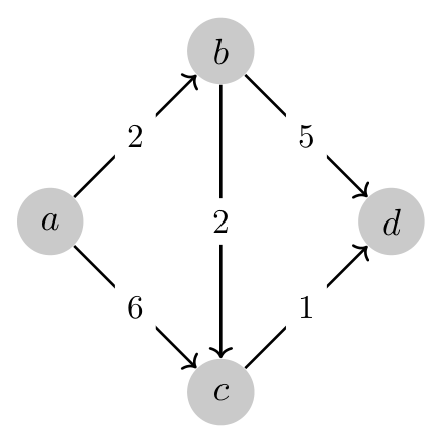

**Q1.** Modéliser ce problème de plus court chemin comme un programme linéaire, et le résoudre grâce à Julia.

In [16]:
#Q1.

# Définition du graphe avec les poids des arcs
graphe = Dict("ab" => 2, "ac" => 6, "bc" => 2, "bd" => 5, "cd" => 1)

# Création du modèle
model = Model(GLPK.Optimizer)

# Définition des variables pour chaque sommet, représentant le coût minimum pour atteindre ce sommet
@variable(model, coût_a >= 0)
@variable(model, coût_b >= 0)
@variable(model, coût_c >= 0)
@variable(model, coût_d >= 0)

# Coût pour atteindre le sommet de départ (a) est 0
@constraint(model, coût_a == 0)

# Contraintes reflétant les poids des arcs entre les sommets
@constraint(model, coût_b >= coût_a + graphe["ab"]) # Arc ab
@constraint(model, coût_c >= coût_a + graphe["ac"]) # Arc ac
@constraint(model, coût_c >= coût_b + graphe["bc"]) # Arc bc
@constraint(model, coût_d >= coût_b + graphe["bd"]) # Arc bd
@constraint(model, coût_d >= coût_c + graphe["cd"]) # Arc cd

# La fonction objectif est de minimiser le coût pour atteindre le sommet d
@objective(model, Min, coût_d)

# Résolution du modèle
optimize!(model)

# Affichage du coût minimal pour atteindre d depuis a
println("Coût minimal du sommet a au sommet d: ", objective_value(model))


Coût minimal du sommet a au sommet d: 7.0


**Q2.** Proposer une structure de donnée pour représenter les graphes orientés munis de poids sur les arcs, en l'explicitant pour l'exemple ci-dessus.

In [28]:
#Q2. Utilisation d'un dictionnaire pour représenter un graphe orienté avec poids
# Les clés sont des tuples représentant les arcs (sommet_de_départ, sommet_d'arrivée)
# Les valeurs sont des entiers représentant le poids de chaque arc

graphe_1 = Dict(
    ("a", "b") => 2,  # Arc de 'a' à 'b' avec un poids de 2
    ("a", "c") => 6,  # Arc de 'a' à 'c' avec un poids de 6
    ("b", "c") => 2,  # Arc de 'b' à 'c' avec un poids de 2
    ("b", "d") => 5,  # Arc de 'b' à 'd' avec un poids de 5
    ("c", "d") => 1   # Arc de 'c' à 'd' avec un poids de 1
)

# Exemple d'accès au poids d'un arc spécifique dans le graphe
# Pour accéder au poids de l'arc allant de 'a' à 'b' :
poids_ab = graphe_1[("a", "b")]
#Exemple
println("Le poids de l'arc de 'a' à 'b' est : ", poids_ab)

# Avantages de cette structure de données :
# Clarté : La correspondance entre les arcs et leurs poids est explicite et facile à comprendre.
# Flexibilité : Il est simple d'ajouter ou de retirer des arcs, ou de modifier les poids.
# Accessibilité : L'accès aux poids des arcs est direct et rapide à l'aide des clés du dictionnaire.


Le poids de l'arc de 'a' à 'b' est : 2


**Q3.**
Ecrire une fonction prenant comme paramètre un graphe et deux sommets, et qui renvoie un plus court chemin reliant le premier sommet au second.

In [46]:
#Q3. en s'inspirant de l'algorithme de djkstra trouver le plus court chemin
function trouver_plus_court_chemin(graphe, depart, arrivee)
    modele = Model(GLPK.Optimizer)
    
    # Ensemble des sommets du graphe
    sommets = unique(vcat([k[1] for k in keys(graphe)], [k[2] for k in keys(graphe)]))
    
    # Variables de décision : coût pour atteindre chaque sommet
    @variable(modele, cout[sommets] >= 0)
    
    # La distance au sommet de départ est 0
    @constraint(modele, cout[depart] == 0)
    
    # Contraintes reflétant les poids des arcs
    for (arc, poids) in graphe
        s1, s2 = arc
        @constraint(modele, cout[s2] <= cout[s1] + poids)
    end
    
    # Objectif : minimiser le coût pour atteindre le sommet d'arrivée
    @objective(modele, Min, cout[arrivee])
    
    # Résolution du modèle
    optimize!(modele)
    
    # Vérification et affichage des résultats
    if termination_status(modele) == MOI.OPTIMAL
        println("Distance minimale de $depart à $arrivee : ", objective_value(modele))
        # Affichage des coûts pour atteindre chaque sommet
        for sommet in sommets
            println("Distance à $sommet : ", value(cout[sommet]))
        end
    else
        println("Aucun chemin trouvé.")
    end
end


trouver_plus_court_chemin (generic function with 1 method)

**Q4.** Retrouver le résultat de la question 1 en utilisant votre fonction.

In [43]:
#Q4.
# on redefinit le graphe (avec structure de donnée plus adapté a notre fonction) on obtient :
g = Dict(
    ("a", "b") => 2,
    ("a", "c") => 6,
    ("b", "c") => 2,
    ("b", "d") => 5,
    ("c", "d") => 1
)

trouver_plus_court_chemin(g, "a", "d")

Distance minimale de a à d : 0.0
Distance à c : 0.0
Distance à b : 0.0
Distance à a : 0.0
Distance à d : 0.0
